# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
"""
you will be forecasting real estate prices of various zip codes 

What are the top 5 best zip codes for us to invest in?

Should your recommendation be focused on profit margins only? 
What about risk? 
What sort of time horizon are you predicting against? 
Your recommendation will need to detail your rationale and answer any sort of lingering questions like these 
    in order to demonstrate how you define "best".

Evaluation
In addition to deciding which quantitative metric(s) you want to target (e.g. minimizing mean squared error), 
    you need to start with a definition of "best investment". 
    Consider additional metrics like risk vs. profitability, or ROI yield.


"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# pd.set_option('display.max_columns', None)  
# df = pd.read_csv('zillow_data.csv')
# df.head()

In [3]:
# pd.set_option('display.max_columns', None)  
# df_1 = pd.read_csv('zillow_data.csv')
# df_1.head()

In [4]:
# pd.set_option('display.max_columns', None)  
# data_ny = pd.read_csv('zillow_data.csv')
# data_ny.head()

In [5]:
#data_ny=data_ny.drop(["RegionID", "City", "State", "Metro", "CountyName", "SizeRank"], axis=1)

In [6]:
# data_ny.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
# data_ny.head()

In [7]:
#pd.set_option('display.max_columns', None)  
zillow = pd.read_csv('zillow_data.csv')
zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [8]:
zillow.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
zillow.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [9]:
"""
from datetime import datetime
#con=data['Month']
df_ny['Date']=pd.to_datetime(df_ny['Date'])
df_ny.set_index('Date', inplace=True)
df_ny.head()


def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

"""

# def melt_data(df):
#     melted = pd.melt(df, id_vars=['Zipcode'], var_name='Date', value_name='SalePrice')
#     melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
#     melted = melted.dropna(subset=['SalePrice'])
#     melted.index=melted['Date']
#     melted.drop('Date',axis=1,inplace=True)
#     return melted#.groupby('Date').aggregate({'SalePrice':'mean'})
   
    
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','Zipcode', 'City', 'State', 'Metro', 'CountyName', 
                                  'SizeRank'], var_name='Month', value_name='MeanValue')
    melted['Month'] = pd.to_datetime(melted['Month'], format='%Y-%m')
    #melted = melted.set_index('Month')
    melted = melted.dropna(subset=['MeanValue'])
    return melted

In [10]:

all_zipcodes = melt_data(zillow)

In [11]:
all_zipcodes.columns

Index(['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', 'Month', 'MeanValue'],
      dtype='object')

In [12]:
all_zipcodes.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Month,MeanValue
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0


In [13]:
kings = all_zipcodes[(all_zipcodes['CountyName']=='Kings') & (all_zipcodes['State']== 'NY')]
kings

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Month,MeanValue
10,62037,11226,New York,NY,New York,Kings,11,1996-04-01,162000.0
13,62045,11235,New York,NY,New York,Kings,14,1996-04-01,190500.0
47,62040,11230,New York,NY,New York,Kings,48,1996-04-01,230100.0
49,62020,11209,New York,NY,New York,Kings,50,1996-04-01,255700.0
53,62023,11212,New York,NY,New York,Kings,54,1996-04-01,125000.0
...,...,...,...,...,...,...,...,...,...
3887683,62035,11224,New York,NY,New York,Kings,812,2018-04-01,517900.0
3888027,62033,11222,New York,NY,New York,Kings,1156,2018-04-01,1721100.0
3888306,62016,11205,New York,NY,New York,Kings,1435,2018-04-01,2248400.0
3888406,62028,11217,New York,NY,New York,Kings,1535,2018-04-01,3656000.0


In [14]:
kings['Zipcode'].nunique()

28

In [15]:
kings.index

Int64Index([     10,      13,      47,      49,      53,      58,      70,
                 72,      95,     106,
            ...
            3887238, 3887295, 3887311, 3887347, 3887572, 3887683, 3888027,
            3888306, 3888406, 3890600],
           dtype='int64', length=7141)

In [16]:
# zip_11226 = kings[kings['Zipcode'] == 11226]
# zip_11226
# zip_11226 = zip_11226.set_index('Month')['MeanValue']
# zip_11226

In [17]:
#zip_11226.index

In [18]:
# zip_11226 = zip_11226.asfreq('MS')

In [19]:
# zip_11226.name = 11226
# zip_11226

In [20]:
# #make loop
# brooklyn_zips = {}

# for zipcode in kings['Zipcode'].unique(): 
#     all_zips = kings[kings['Zipcode'] == zipcode]
#     all_zips = all_zips.set_index('Month')['MeanValue']
#     all_zips = all_zips.asfreq('MS')
#     brooklyn_zips[zipcode] = all_zips

In [21]:
# brooklyn_zips[11224]

In [22]:
#brooklyn_zips

In [23]:
# k = k.resample('MS').mean()
# brooklyn.index

In [24]:
# brooklyn_zips[11226].plot()

In [25]:
kings_1 = zillow.copy()
#kings_1 = kings_1.set_index('Month')
kings_plot = kings_1[(kings_1['CountyName']=='Kings') & (kings_1['State']== 'NY')]


In [26]:
kings_plot = kings_plot.drop(["RegionID", "City", "State", "Metro", "CountyName", "SizeRank"], axis=1)
kings_plot.head()

,Zipcode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
10,11226,162000.0,162300.0,162600.0,163000.0,163400.0,164000.0,164700.0,165700.0,166800.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
13,11235,190500.0,191000.0,191500.0,192000.0,192500.0,193000.0,193600.0,194300.0,195300.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
47,11230,230100.0,230800.0,231500.0,232100.0,232800.0,233600.0,234700.0,235900.0,237500.0,...,1079200,1082700,1082800,1084900,1091200,1102400,1120200,1141600,1170000,1195400
49,11209,255700.0,256600.0,257300.0,258100.0,258900.0,259800.0,260900.0,262000.0,263600.0,...,1005000,1013400,1019500,1024400,1024900,1018900,1023500,1029200,1023000,1015800
53,11212,125000.0,125000.0,125000.0,125000.0,125100.0,125100.0,125000.0,124800.0,124600.0,...,380000,387000,394600,401500,407900,414900,422300,426300,427100,428400


In [27]:
kings_plot = kings_plot.transpose()


In [28]:
new_header=kings_plot.iloc[0] ##grab all first row data for the column headers
kings_plot = kings_plot[1:] ## take all rows after first row
kings_plot.columns=new_header ## assign all column headers to be equal to row 0 data

In [29]:
kings_plot.head()

Zipcode,11226.0,11235.0,11230.0,11209.0,11212.0,11214.0,11221.0,11229.0,11234.0,11215.0,...,11219.0,11203.0,11220.0,11216.0,11210.0,11224.0,11222.0,11205.0,11217.0,11228.0
1996-04,162000.0,190500.0,230100.0,255700.0,125000.0,191000.0,133700.0,183900.0,172300.0,225700.0,...,213200.0,149000.0,188500.0,146100.0,187300.0,158000.0,149200.0,NaN,NaN,219300.0
1996-05,162300.0,191000.0,230800.0,256600.0,125000.0,191200.0,133700.0,184200.0,172100.0,227500.0,...,212600.0,149200.0,188700.0,146600.0,187300.0,157300.0,148400.0,NaN,NaN,219600.0
1996-06,162600.0,191500.0,231500.0,257300.0,125000.0,191500.0,133700.0,184500.0,171900.0,229400.0,...,211900.0,149400.0,188800.0,147200.0,187200.0,156700.0,147500.0,NaN,NaN,219900.0
1996-07,163000.0,192000.0,232100.0,258100.0,125000.0,191900.0,133700.0,184800.0,171600.0,231600.0,...,211300.0,149600.0,189000.0,147700.0,187100.0,156100.0,146600.0,NaN,NaN,220200.0
1996-08,163400.0,192500.0,232800.0,258900.0,125100.0,192100.0,133900.0,185000.0,171400.0,234100.0,...,210800.0,149700.0,189400.0,148400.0,187000.0,155600.0,146000.0,NaN,NaN,220600.0


In [30]:
kings_plot.index

Index(['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=265)

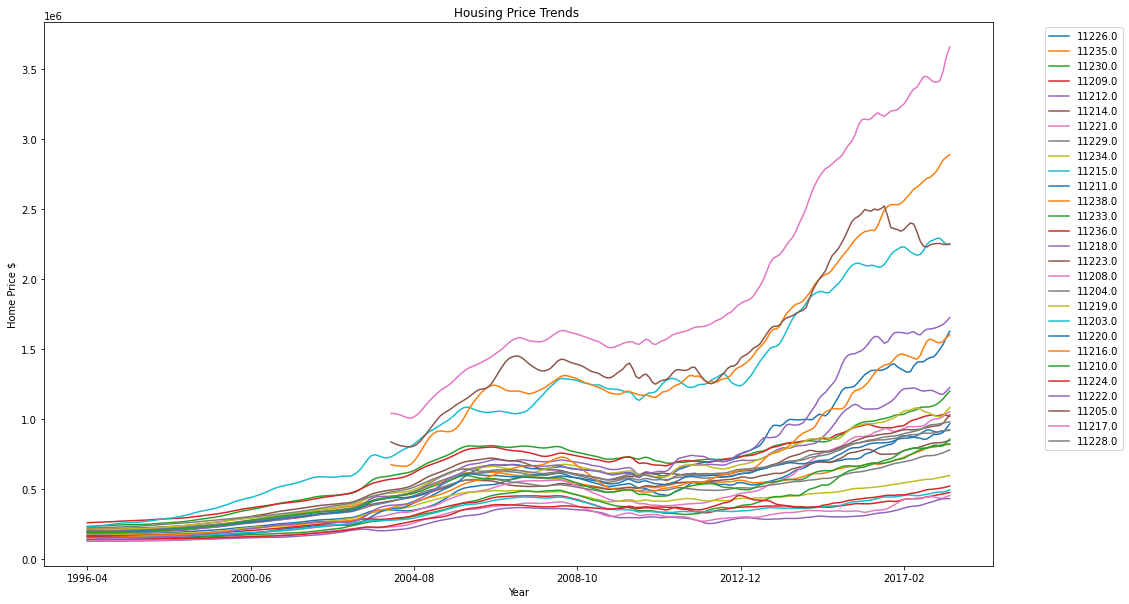

In [31]:
kings_plot.plot(figsize=(17,10))
plt.title("Housing Price Trends ")
plt.xlabel('Year')
plt.ylabel('Home Price $')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

In [32]:
zip_11226 = kings[kings['Zipcode'] == 11226]
zip_11226
zip_11226 = zip_11226.set_index('Month')['MeanValue']
zip_11226

Month
1996-04-01    162000.0
1996-05-01    162300.0
1996-06-01    162600.0
1996-07-01    163000.0
1996-08-01    163400.0
                ...   
2017-12-01    887800.0
2018-01-01    890500.0
2018-02-01    901700.0
2018-03-01    930700.0
2018-04-01    963200.0
Name: MeanValue, Length: 265, dtype: float64

In [33]:
zip_11226 = zip_11226.asfreq('MS')

In [34]:
zip_11226.name = 11226
zip_11226

Month
1996-04-01    162000.0
1996-05-01    162300.0
1996-06-01    162600.0
1996-07-01    163000.0
1996-08-01    163400.0
                ...   
2017-12-01    887800.0
2018-01-01    890500.0
2018-02-01    901700.0
2018-03-01    930700.0
2018-04-01    963200.0
Freq: MS, Name: 11226, Length: 265, dtype: float64

In [35]:
#make loop
brooklyn_zips = {}

for zipcode in kings['Zipcode'].unique(): 
    all_zips = kings[kings['Zipcode'] == zipcode]
    all_zips = all_zips.set_index('Month')['MeanValue']
    all_zips = all_zips.asfreq('MS')
    brooklyn_zips[zipcode] = all_zips

In [36]:
brooklyn_zips[11224]

Month
1996-04-01    158000.0
1996-05-01    157300.0
1996-06-01    156700.0
1996-07-01    156100.0
1996-08-01    155600.0
                ...   
2017-12-01    498700.0
2018-01-01    502000.0
2018-02-01    505600.0
2018-03-01    511600.0
2018-04-01    517900.0
Freq: MS, Name: MeanValue, Length: 265, dtype: float64

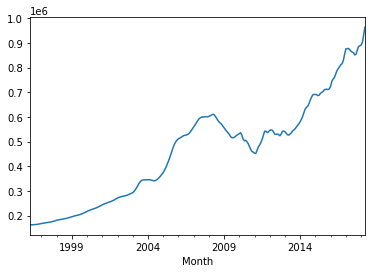

In [37]:
brooklyn_zips[11226].plot()

In [38]:
def stationary_test(df):
    rolling_mean = df.rolling(window=12).mean()
    rolling_std = df.rolling(window=12).std()

    plt.plot(df,color='blue',label='orignal')
    plt.plot(rolling_mean, color='red',label='Rolling Mean')
    plt.plot(rolling_std, color='green',label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Rolling Standard Deviation')
    #plt.show()
    result = adfuller(df)
    print('ADF statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{} : {}'.format(key,value))
        
    names = ['Test Statistic','p-value','#Lags Used','# of Observations Used']
    res  = dict(zip(names,result[:4]))
    res['Stationary Results'] = res['p-value']<.05
    
    return pd.DataFrame(res,index=['AD Fuller Results'])    

ADF statistic: 0.6254102589740157
p-value: 0.9882254867110694
Critical Values:
	1% : -3.4568881317725864
	5% : -2.8732185133016057
	10% : -2.5729936189738876


,Test Statistic,p-value,#Lags Used,# of Observations Used,Stationary Results
AD Fuller Results,0.62541,0.988225,15,249,False


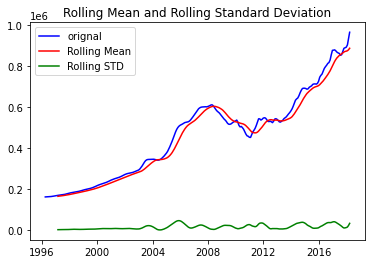

In [39]:
stationary_test(brooklyn_zips[11226])

In [40]:
#nyc = df[df['CountyName']== 'Kings']
#df_kings = df_1[df_1['CountyName']== 'Kings']

In [41]:
#df_kings = df_kings.drop(["RegionID", "City", "State", "Metro", "CountyName", "SizeRank"], axis=1)

In [42]:
# df_kings.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
# df_kings.head()

In [43]:
# df_kings.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
# df_kings.head()

In [44]:
## Reset dataframe index and drop old index related to original zillow dataset
#df_kings.reset_index(drop=True)

In [45]:
#df_kings["Zipcode"]=df_kings["Zipcode"].astype(str)

In [46]:
## transpose dates to rows
# df_kings=df_kings.transpose()
# df_kings.head()

In [47]:
# new_header=df_kings.iloc[0] ##grab all first row data for the column headers
# df_kings=df_kings[1:] ## take all rows after first row
# df_kings.columns=new_header ## assign all column headers to be equal to row 0 data

In [48]:
# df_kings.plot(figsize=(17,8))
# plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
# plt.title("Housing Price Trends ")
# plt.xlabel('Year')
# plt.ylabel('Home Price $')

# Step 2: Data Preprocessing

In [49]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [50]:
from datetime import datetime
#con=data['Month']
# df_wide['Date']=pd.to_datetime(df_wide['Date'])
# df_wide.set_index('Date', inplace=True)
# df_wide.head()

In [51]:
#ts_plot(sales_daily, title='Daily Sales')

In [52]:
#stationary_test(sales_daily)

In [53]:
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['sig'] = dfoutput['p-value']<.05
    display (dfoutput.round(3))
    
    return dfoutput

In [54]:
#stationarity_check(brooklyn);

## Removing Trends

### Log-Transformation (np.log)


In [55]:
# sales_log = np.log(sales_daily)
# sales_log.plot()
# stationarity_check(sales_log)

In [56]:
def adfuller_test_df(ts):
    """Returns the AD Fuller Test Results and p-values for the null hypothesis
    that there the data is non-stationary (that there is a unit root in the data)"""
    df_res = adfuller(ts)
    names = ['Test Statistic','p-value','#Lags Used','# of Observations Used']
    res  = dict(zip(names,df_res[:4]))
    res['p<.05'] = res['p-value']<.05
    res['Stationary?'] = res['p<.05']
    
    return pd.DataFrame(res,index=['AD Fuller Results'])

In [57]:
# ts3 = np.log(sales_log)
# ts3.plot()
# adfuller_test_df(ts3)

### Differencing

In [58]:
# ts0 = sales_daily.diff().dropna()
# ts0.plot()

# adfuller_test_df(ts0)

### Subtract Rolling Mean (ts-ts.rolling().mean())

In [59]:
## Subtract Rolling mean
# ts2 = (sales_daily - sales_daily.rolling(3).mean()).dropna()
# ts2.plot()
# adfuller_test_df(ts2)

In [60]:
## Subtract Exponentially Weight Mean Rolling mean
# ts4 = (sales_daily - sales_daily.ewm(halflife=7).mean()).dropna()
# ts4.plot()
# adfuller_test_df(ts4)

# Step 3: EDA and Visualization

In [61]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [62]:
#ny_county_1.head()

# Step 4: Reshape from Wide to Long Format

In [63]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [64]:
#melt_data(ny_county_1)

# Step 5: ARIMA Modeling

### Return on Investment (ROI)

In [65]:
investment = 40000
rent = 700
loss = 1000  #cost of 1000 per year

def roi(investment, rent, loss):
    """
    return on investment is calcualted by net_profit / investment * 100
    12 = # of months in year 
    investment part doesn't need to be touched investment amount is just capital cost of building
    """
    netprofit = rent * 12 - loss
    ROI = (netprofit / investment) * 100
    print(ROI)
    
#roi(investment, rent, loss) 
#calculated return on investment for these parameters
roi(investment, rent, loss)   

18.5


In [66]:
#want to buy a house that is 60000 instead of 40,000
investment = 60000
rent = 700
loss = 1000  #cost of 1000 per year

def roi(investment, rent, loss):
    """
    return on investment is calcualted by net_profit / investment * 100
    12 = # of months in year 
    investment part doesn't need to be touched investment amount is just capital cost of building
    """
    netprofit = rent * 12 - loss
    ROI = (netprofit / investment) * 100
    print(ROI)
    
#roi(investment, rent, loss) 
#calculated return on investment for these parameters
roi(investment, rent, loss)   

12.333333333333334
